# Prediction of House Prices: Advanced Regression - Assignment

### What is the business objective ?

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

####  Importing the required libraries for EDA


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline 

# libraries for regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

#### Loading the data into dataframe

In [2]:
# Read the housing price data file and explore the data
house_price_df = pd.read_csv('datasets/train.csv')
# Display the top 5 rows 
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Display the last 5 rows 
house_price_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Data Understanding and Cleaning

In [4]:
# Get total rows and columns
house_price_df.shape

(1460, 81)

In [5]:
# Understand the columns and data
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Get an overall idea on the numeric variables
house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Remove duplicates if any
house_price_df = house_price_df.drop_duplicates()
house_price_df.shape

(1460, 81)

In [8]:
# summing up the missing values (column-wise)
house_price_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [9]:
# Get percentage of null values present in the columns
round(100 *(house_price_df.isnull().sum() / len(house_price_df)), 2).sort_values(ascending=False).head(25)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
YearRemodAdd     0.00
MSSubClass       0.00
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
dtype: float64

In [10]:
# We will remove the MiscFeature and PoolQC columns as it contains more than 95% null values.
house_price_df.drop("MiscFeature", axis=1, inplace=True)
house_price_df.drop("PoolQC", axis=1, inplace=True)

In [11]:
# Replace the null values with None as it is given in the Data dictionary that null mean it doesn't have that feature
for column in [
    'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
    'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2','BsmtCond', 'BsmtQual', 
    'MasVnrType',  'Electrical']:
    
    house_price_df[column].fillna('None', inplace=True)

There are a lot of columns which are highly skewed, so we will remove those columsn which contains more than 85% of ```same value```.
<br>
 x = (85 * 1460)/ 100 = ***1241***

In [12]:
def remove_high_skewed_categories():
    """ Function to find the highly skewed categories
    """
    column_names = []
    categorical_columns = house_price_df.select_dtypes(include=['object'])
    for column in (categorical_columns):
        if(house_price_df[column].value_counts().max() >= 1241):
            column_names.append(column)

    return column_names

# Get columns
columns = remove_high_skewed_categories()
# Remove the columns from the data set
house_price_df.drop(columns, axis=1, inplace=True)

In [13]:
# Get the dataset info to confirm the delete
print(house_price_df.shape)
house_price_df.head()

(1460, 60)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
def remove_high_skewed_numeric():
    """ Function to find the highly skewed numeric columns
    """
    column_names = []
    numeric_columns = house_price_df.select_dtypes(include=['int64', 'float'])
    for column in (numeric_columns):
        if(house_price_df[column].value_counts().max() >= 1241):
            column_names.append(column)

    return column_names

# Get columns
columns = remove_high_skewed_numeric()
# Remove the columns from the data set
house_price_df.drop(columns, axis=1, inplace=True)

For the numeric columns, `LotFrontage` and  `MasVnrArea`, we are replacing the null values with the `median` values.

In [15]:
# Replace the null values in numeric columns with their median
house_price_df.LotFrontage.replace(np.nan, house_price_df.LotFrontage.median(), inplace=True)
house_price_df.MasVnrArea.fillna(house_price_df.MasVnrArea.median(), inplace=True)

In [16]:
# Get the unique value counts of GarageYrBlt as it is the only column to process
house_price_df.GarageYrBlt.value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [17]:
# Replacing the null values with zero for now
house_price_df.GarageYrBlt.fillna(0, inplace=True)

# Convert the value to integer as the data represents an year
house_price_df["GarageYrBlt"] = house_price_df.GarageYrBlt.astype(int)

In [18]:
# Check whether the house is remodelled or not

def is_remodel(data):
    """ Function to check whether the house is re-modelled or not
    """
    if(data['YearBuilt'] == data['YearRemodAdd']):
        return 0
    elif(data['YearBuilt'] < data['YearRemodAdd']):
        return 1
  
house_price_df['RemodelFlag'] = house_price_df.apply(is_remodel, axis=1)
house_price_df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,RemodelFlag
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,12,2008,Normal,250000,0


In [19]:
# Get the age of the house when it is sold
def get_age_house(data):
    """ Function to find the age of the house when it is sold
    """
    if(data['YearBuilt'] == data['YearRemodAdd']):
        return data['YrSold'] - data['YearBuilt']
    else:
        return data['YrSold'] - data['YearRemodAdd']
       
house_price_df['BuiltAge'] = house_price_df.apply(get_age_house, axis=1)
house_price_df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,RemodelFlag,BuiltAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,2008,Normal,250000,0,8


In [20]:
# Get the number of years where the garage is built with respect to the maximun year present in the data.
house_price_df["GarageBltOld"] = house_price_df.GarageYrBlt.max() - house_price_df.GarageYrBlt

In [21]:
# Remove the old columns as we have converted these into number of years
house_price_df.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"], axis=1, inplace=True)

In [22]:
# Get percentage of null values present in the columns again after the removal and processing
round(100 *(house_price_df.isnull().sum() / len(house_price_df)), 2).sort_values(ascending=False).head(25)

GarageBltOld    0.0
RoofStyle       0.0
BsmtFinSF1      0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtQual        0.0
Foundation      0.0
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
OverallCond     0.0
BuiltAge        0.0
OverallQual     0.0
HouseStyle      0.0
BldgType        0.0
Neighborhood    0.0
LotConfig       0.0
LotShape        0.0
LotArea         0.0
LotFrontage     0.0
MSZoning        0.0
MSSubClass      0.0
BsmtUnfSF       0.0
dtype: float64

- There are no missing values in any of the columns.
- We can directly remove the ```Id``` as it is unique for each observation and won't help us in our analysis.

In [23]:
# Removing the id and MoSold as it won't do any impact on the SalePrice
house_price_df.drop("Id", axis=1, inplace=True)
house_price_df.drop("MoSold", axis=1, inplace=True)
house_price_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,RemodelFlag,BuiltAge,GarageBltOld
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,548,0,61,None,Normal,208500,0,5,7
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,460,298,0,None,Normal,181500,0,31,34
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,608,0,42,None,Normal,223500,1,6,9
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,642,0,35,None,Abnorml,140000,1,36,12
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,836,192,84,None,Normal,250000,0,8,10


#### Outlier Treatment

In [24]:
# Checking for outliers based on percentiles values
house_price_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,RemodelFlag,BuiltAge,GarageBltOld
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,141.260274
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,453.697295
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,9.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,33.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,52.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,82.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,2010.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,2010.000000


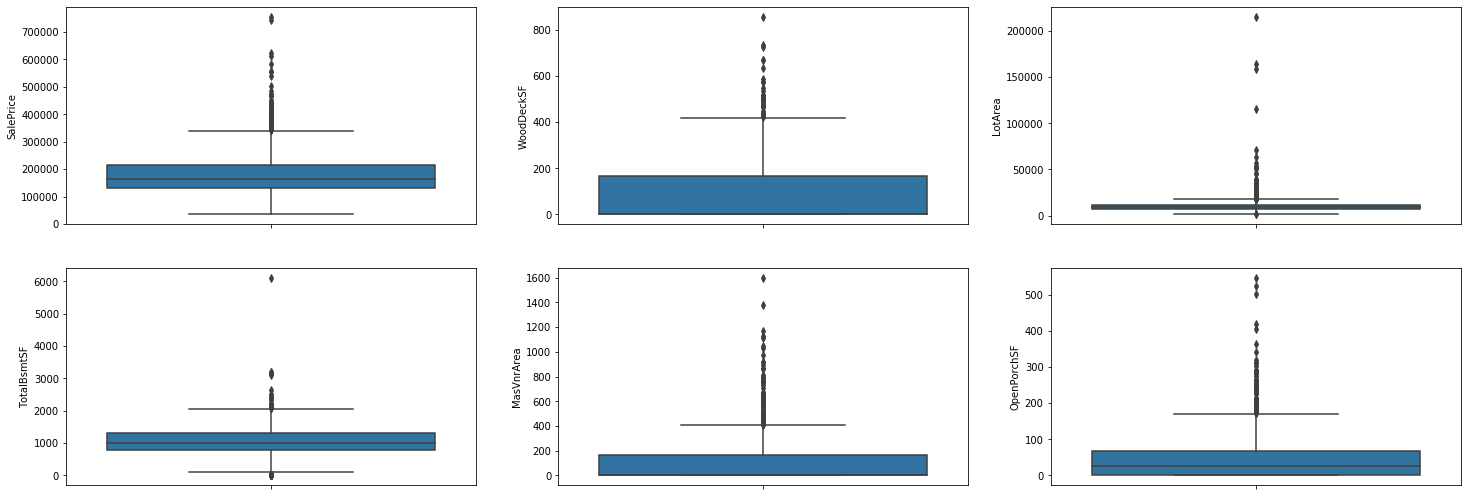

In [25]:
# Create boxplot for outlier analysis
plt.figure(figsize=(25, 28))
plt.subplot(6 , 3, 1)
sns.boxplot(y="SalePrice", data=house_price_df)
plt.subplot(6, 3, 2)
sns.boxplot(y="WoodDeckSF", data=house_price_df)
plt.subplot(6, 3, 3)
sns.boxplot(y="LotArea", data=house_price_df)
plt.subplot(6, 3, 4)
sns.boxplot(y="TotalBsmtSF", data=house_price_df)
plt.subplot(6, 3, 5)
sns.boxplot(y="MasVnrArea", data=house_price_df)
plt.subplot(6 ,3, 6)
sns.boxplot(y="OpenPorchSF", data=house_price_df)
plt.show()

In [26]:
# Remove the outliers by filtering out the last percentile values
columns = [
    "LotArea", "MasVnrArea", "TotalBsmtSF",
    "WoodDeckSF", "OpenPorchSF"
]
def drop_outliers_values(data):
    """ Function to remove the observations belonging to last quantile 
    """
    for col in columns:
        upper_q = data[col].quantile(.99)
        data =  data[(data[col] <= upper_q)] 
    return data

house_price_df = drop_outliers_values(house_price_df)

In [27]:
# Calculate the remaining percentage of data after the cleaning
round(100*(len(house_price_df) / 1460), 2)

94.93

We have removed around ***6%*** percentage of data after cleaning and processing for outliers in the given dataset

***

### EDA and Data Visualisation

In [28]:
# Get the shape of the data
house_price_df.shape

(1386, 48)

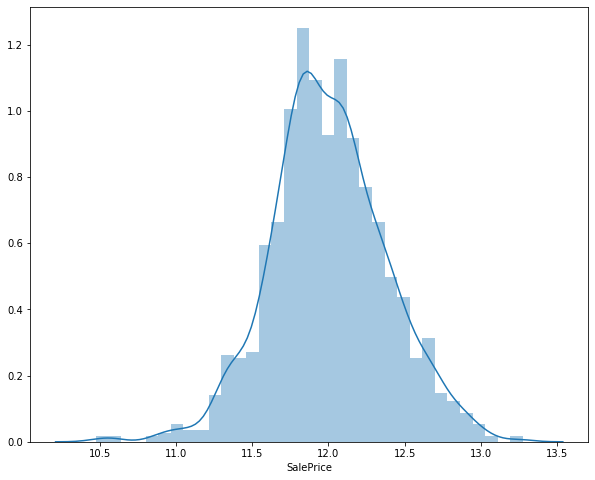

In [29]:
# Plot the SalePrice column with transformation as it is skewed 
plt.figure(figsize=(10, 8))
house_price_df['SalePrice'] = np.log(house_price_df.SalePrice)
sns.distplot(house_price_df.SalePrice)
plt.show()

__Observation__
<br>
The distributiion seems to be normalised

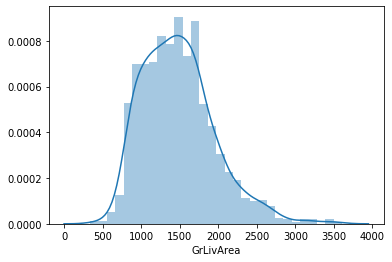

In [30]:
# Plot distribution of GrLivArea
sns.distplot(house_price_df.GrLivArea)
plt.show()

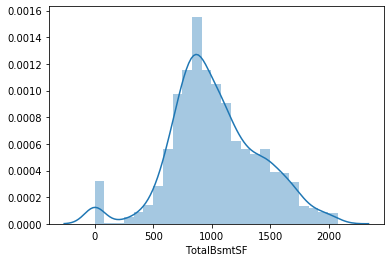

In [31]:
# Plot distribution of TotalBsmtSF
sns.distplot(house_price_df['TotalBsmtSF'])
plt.show()

__Observations__
<br>
The distributiion seems to be normalised

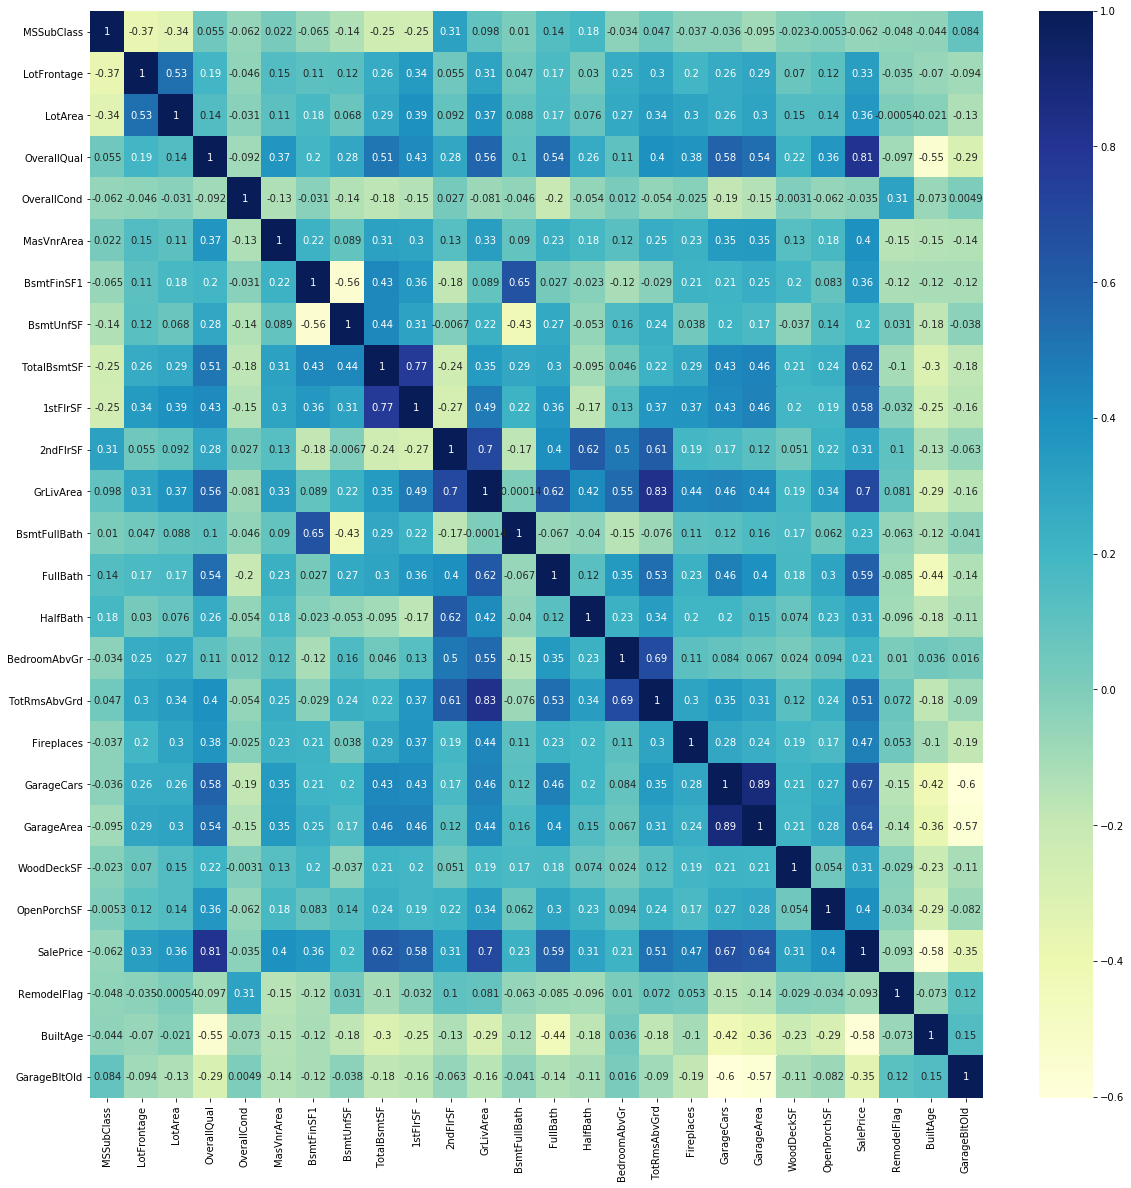

In [32]:
# Plot the heatmap to understand the correlation between the variables.
plt.figure(figsize = (20, 20))
sns.heatmap(house_price_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 720x360 with 0 Axes>

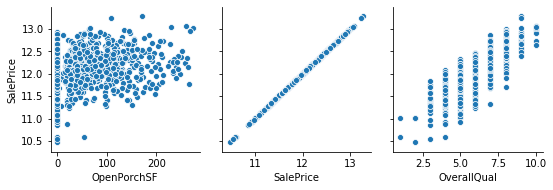

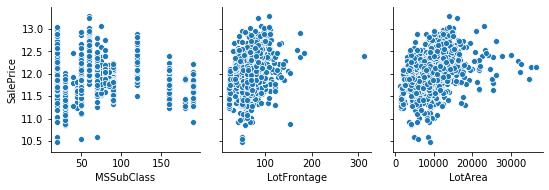

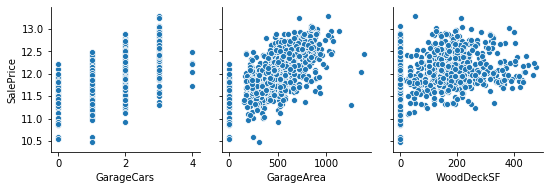

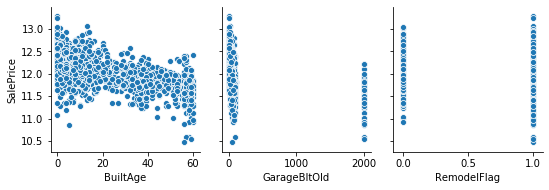

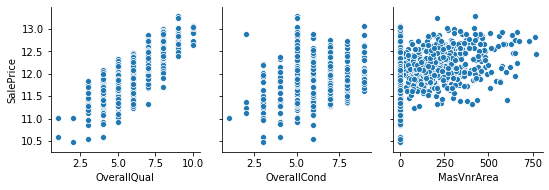

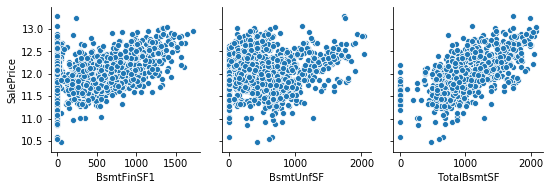

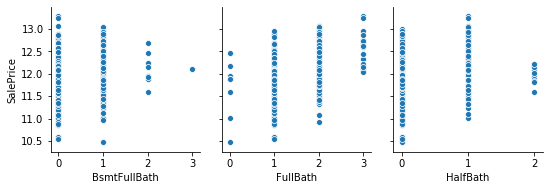

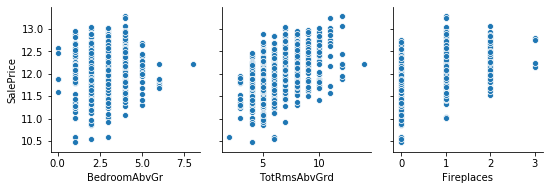

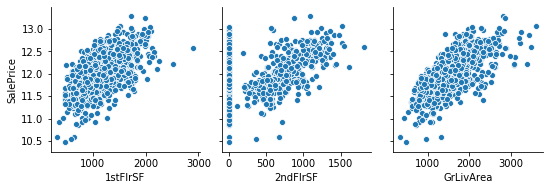

In [33]:
# Plotting the variables to understand the correlation between sales price
plt.figure(figsize=(10,5))
sns.pairplot(house_price_df, x_vars=['OpenPorchSF','SalePrice', 'OverallQual'] , y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=["BuiltAge", "GarageBltOld", "RemodelFlag"], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice')
sns.pairplot(house_price_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice')
plt.show()

__Observation__
- It seems like `GrLivArea` and `TotRmsAbvGrd` has got high correlation of `83%`
- `GarageCars` and `GarageArea` has also high correlation of `89%`
- Most of the variables are scattered on the pairplot

In [34]:
# Drop one of the correlated variables
house_price_df.drop(["TotRmsAbvGrd", "GarageArea"], axis=1, inplace=True)

#### Basement Features vs SalePrice

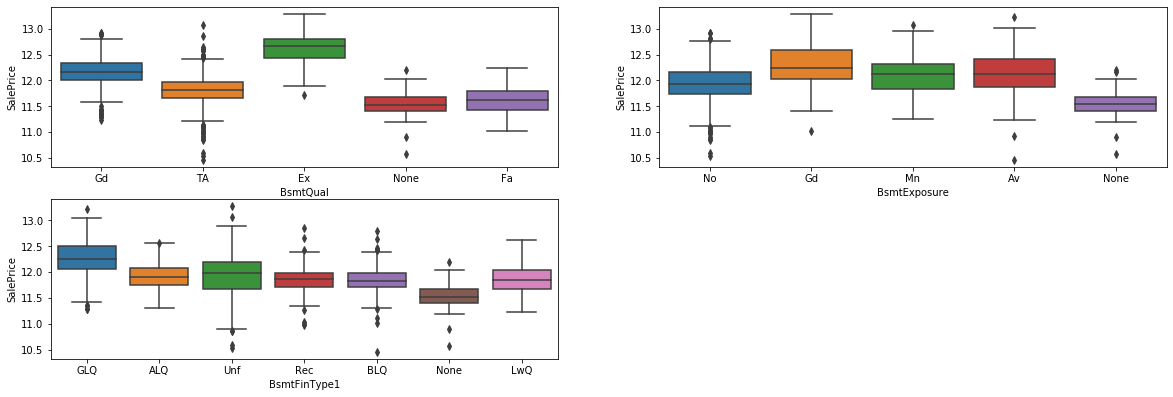

In [35]:
# Plot Basement features with SalePrice
plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1)
sns.boxplot(x='BsmtQual', y='SalePrice', data=house_price_df)
plt.subplot(3, 2, 2)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=house_price_df)
plt.subplot(3, 2, 3)
sns.boxplot(x='BsmtFinType1',y='SalePrice', data=house_price_df)
plt.show()

__Observation__
<br>
- `BsmtFinType1` doesn't shows any significant relation with SalePrice so we can remove it

In [36]:
# Removing BsmtFinType1
house_price_df.drop(["BsmtFinType1"], inplace=True, axis=1)

#### Garage Features vs SalePrice

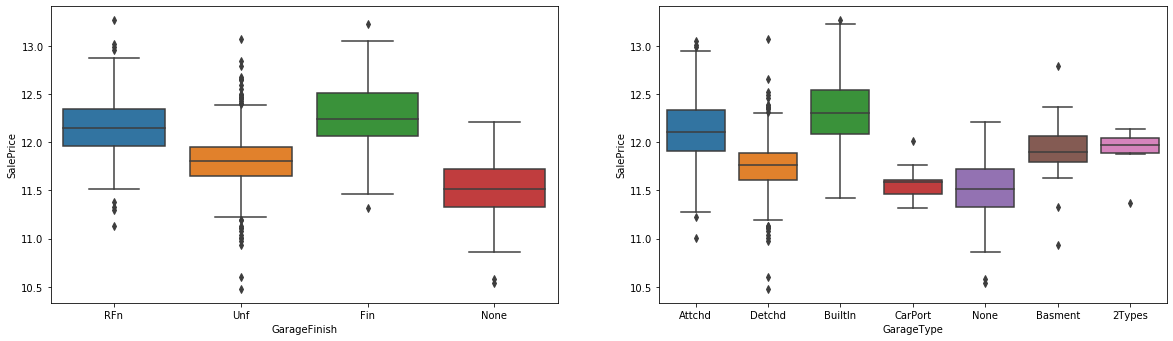

In [37]:
# Plot Garage features with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='GarageFinish', y='SalePrice', data=house_price_df)
plt.subplot(2, 2, 2)
sns.boxplot(x='GarageType', y='SalePrice', data=house_price_df)
plt.show()

#### GrLivArea vs SalePrice

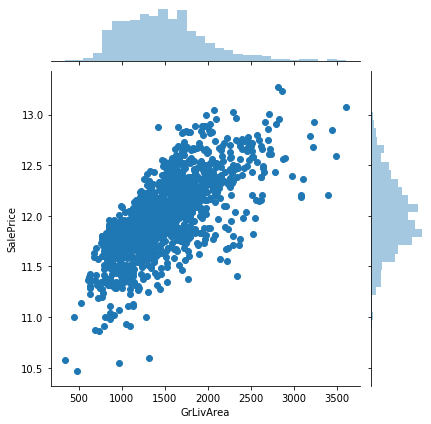

In [38]:
plot = sns.jointplot(x="GrLivArea", y="SalePrice", data=house_price_df)
plt.show()

__Observation__
- Higher sale price for higher GrLivArea

#### OverallQual vs SalePrice

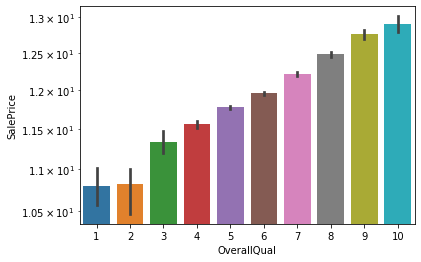

In [39]:
plot = sns.barplot(x="OverallQual", y="SalePrice", data=house_price_df)
plot.set_yscale("log")
plt.show()

__Observation__
- `SalePrice` increases as the `OverallQual` increases

#### GarageCars vs SalePrice

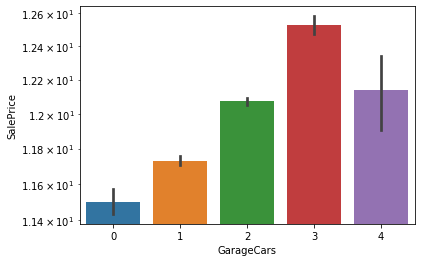

In [40]:
plot = sns.barplot(x="GarageCars", y="SalePrice", data=house_price_df)
plot.set_yscale("log")
plt.show()

__Observation__
- Higher sale price for GarageCars till ***3***

#### GarageCars vs OverallCond vs SalePrice

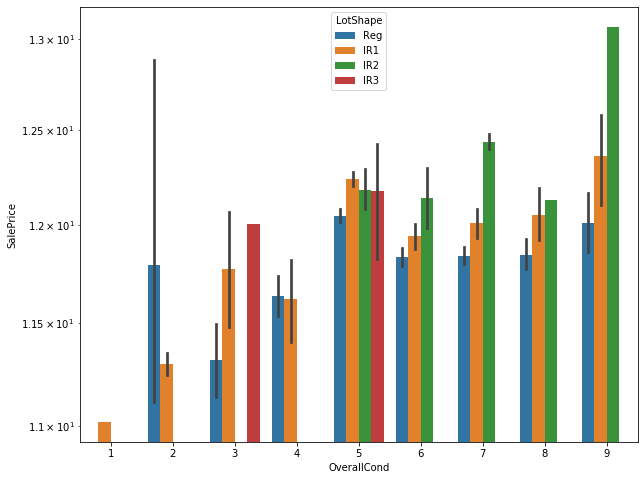

In [41]:
plt.figure(figsize=(10, 8))
plot = sns.barplot("OverallCond", "SalePrice", hue="LotShape", data=house_price_df)
plot.set_yscale("log")
plt.show()

__Observation__
- As the overall condition increases SalePrice also increases
- Within each condition, GarageCars having value 3 has got higher SalePrice

***

### Build Regression Model

#### Data Preparation

There are some columns which we have found some order, so instead of applying dummy encoding directly, we map them values manually in the order

In [42]:
# Get the shape of the dataset
print(house_price_df.shape)
# Get all the column names and its info
house_price_df.info()

(1386, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1386 non-null   int64  
 1   MSZoning       1386 non-null   object 
 2   LotFrontage    1386 non-null   float64
 3   LotArea        1386 non-null   int64  
 4   LotShape       1386 non-null   object 
 5   LotConfig      1386 non-null   object 
 6   Neighborhood   1386 non-null   object 
 7   BldgType       1386 non-null   object 
 8   HouseStyle     1386 non-null   object 
 9   OverallQual    1386 non-null   int64  
 10  OverallCond    1386 non-null   int64  
 11  RoofStyle      1386 non-null   object 
 12  Exterior1st    1386 non-null   object 
 13  Exterior2nd    1386 non-null   object 
 14  MasVnrType     1386 non-null   object 
 15  MasVnrArea     1386 non-null   float64
 16  ExterQual      1386 non-null   object 
 17  Foundation     1386 non-null   object 
 1

In [43]:
# Mapping values manually to ordered columns
house_price_df["ExterQual"] = house_price_df.ExterQual.replace(
    {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0 }
)
house_price_df["FireplaceQu"] = house_price_df.FireplaceQu.replace(
    {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
)
house_price_df["GarageFinish"] = house_price_df.GarageFinish.replace(
    {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0 }
)
house_price_df["BldgType"] = house_price_df.BldgType.replace({
    "Twnhs": 5, "TwnhsE": 4, "Duplex": 3, 
     "2fmCon": 2, "1Fam": 1, "None": 0 
})
house_price_df["HouseStyle"] = house_price_df.HouseStyle.replace({
    "SLvl": 8, "SFoyer": 7, "2.5Fin": 6, "2.5Unf": 5,
    "2Story": 4,"1.5Fin": 3, "1.5Unf": 2, "1Story": 1, 
    "None": 0 
})
house_price_df["LotShape"] = house_price_df.LotShape.replace(
    {"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0}
)
house_price_df["Fence"] = house_price_df.Fence.replace(
    {"GdPrv": 4, "GdWo": 3, "MnPrv": 2, "MnWw": 1, "None": 0 }
)
house_price_df["SaleCondition"] = house_price_df.SaleCondition.replace({
    "Normal": 1, "Partial": 1, "Abnorml": 0, 
    "Family": 0, "Alloca": 0, "AdjLand": 0, "None": 0
})
house_price_df["HeatingQC"] = house_price_df.HeatingQC.replace(
    {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
)
house_price_df["KitchenQual"] = house_price_df.KitchenQual.replace(
    {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
)
house_price_df["LotConfig"] = house_price_df.LotConfig.replace({
    "Inside": 5, "Corner": 4, "CulDSac": 3, 
    "FR2": 2, "FR3": 1, "None": 0
})
house_price_df["BsmtQual"] = house_price_df.BsmtQual.replace(
    {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
)
house_price_df["BsmtExposure"] = house_price_df.BsmtExposure.replace(
    {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}
)
house_price_df["MasVnrType"] = house_price_df.MasVnrType.replace({
    "BrkCmn": 1, "BrkFace": 1, "CBlock": 1, "Stone": 1, "None": 0
})

In [44]:
# Create the dummy variables for the remaining features
remain_columns = house_price_df[["MSZoning", "Neighborhood", "RoofStyle", "Exterior1st", "Exterior2nd", "Foundation", "GarageType"]]
dummy_col = pd.get_dummies(remain_columns, drop_first=True)

In [45]:
# Check wthether the dummy variables are created correctly.
dummy_col.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalS

In [46]:
# Get the total columns for dummy dataframe
dummy_col.shape

(1386, 73)

In [47]:
# Concat the dummy dataframe with the master housing_price dataframe
house_price_df = pd.concat([house_price_df, dummy_col], axis=1)
house_price_df.shape

(1386, 118)

In [48]:
# Remove the original catagorical columns in which dummy variables are created.
house_price_df.drop(
    ["MSZoning", "Neighborhood", "RoofStyle", "Exterior1st", "Exterior2nd", "Foundation", "GarageType"],
    axis=1, inplace=True
)
# Get the shape of the dataframe after creating dummy and removing categorical variables.
house_price_df.shape

(1386, 111)

In [49]:
# Confirm the dummy variable creation
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 111 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(35), uint8(73)
memory usage: 561.1 KB


#### Split the data into Train and Test sets

In [50]:
# Split the dataframe into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(house_price_df, train_size=0.7, test_size=0.3)

In [51]:
# Perform StandarScaler for all the variables
scaler = StandardScaler()
# Apply scaling to train data
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])

# Apply scaling to test data but peform the transform instead of fit_transform
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])

In [52]:
# Split the training data into dependent and independent variables (X and y)
y_train = df_train.pop("SalePrice")
X_train = df_train

In [53]:
# Split the testing data into dependent and independent variables (X and y)
y_test = df_test.pop("SalePrice")
X_test = df_test

In [54]:
def checkVIF(X):
    """ Calculate the VIF for the given independent variables.
    """
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return(vif)

#### Recursive Feature Elimination

There are around **112** features, so we will use this RFE approach to limit it to **30** features

In [55]:
# Create a linear regression model to perform RFR
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Perform feature elimeation to filter out 30 features
rfe = RFE(linear_model, 30)            
rfe = rfe.fit(X_train, y_train)

In [56]:
# Get all the supported columns
columns = X_train.columns[rfe.support_]
desired_feature_df = pd.DataFrame(
    list(zip(X_train.columns, rfe.support_, rfe.ranking_)),
    columns=["Features", "Support", "Rank"]
)
desired_feature_df = desired_feature_df.loc[desired_feature_df["Support"] == True]
desired_feature_df.reset_index(drop=True, inplace=True)

In [57]:
desired_feature_df.head(50)

,Features,Support,Rank
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtQual,True,1
5,BsmtExposure,True,1
6,BsmtFinSF1,True,1
7,BsmtUnfSF,True,1
8,TotalBsmtSF,True,1
9,HeatingQC,True,1


In [58]:
# Filter out the rfe supported columns from the X_train and X_test dataframe
X_train = X_train[columns]
X_test =  X_test[columns]

In [59]:
X_train.shape

(970, 30)

In [60]:
# Check the VIF for all the filtered features
vif = checkVIF(X_train)
vif

,Features,VIF
17,GarageBltOld,1272.47
29,GarageType_None,1233.10
12,GrLivArea,82.31
11,2ndFlrSF,67.46
10,1stFlrSF,49.07
20,MSZoning_RL,24.15
21,MSZoning_RM,18.71
8,TotalBsmtSF,12.72
7,BsmtUnfSF,9.74
6,BsmtFinSF1,9.53


Based on the VIF values for the above features, some of the variables has got very VIF value, and the ideal acceptance value of VIF is less than **10**. So we need to remove certain variables to avoid `multicollinearity` issue. Following are the variables that we need to remove the multicollinearity issue
- GarageBltOld
- 2ndFlrSF
- MSZoning_RM
- BsmtUnfSF

In [61]:
# Remove the variables from train data to remove multicollinearity issue
X_train.drop(["GarageBltOld"], axis=1, inplace=True)
X_train.drop(["2ndFlrSF"], axis=1, inplace=True)
X_train.drop(["MSZoning_RM"], axis=1, inplace=True)
X_train.drop(["BsmtUnfSF"], axis=1, inplace=True)

In [62]:
# Remove the variables from test data to remove multicollinearity issue
X_test.drop(["GarageBltOld"], axis=1, inplace=True)
X_test.drop(["2ndFlrSF"], axis=1, inplace=True)
X_test.drop(["MSZoning_RM"], axis=1, inplace=True)
X_test.drop(["BsmtUnfSF"], axis=1, inplace=True)

In [63]:
# Check the VIF values again after the fix
vif = checkVIF(X_train)
vif

,Features,VIF
7,TotalBsmtSF,5.81
23,Foundation_PConc,4.82
9,1stFlrSF,4.72
22,Foundation_CBlock,3.82
15,MSZoning_FV,3.79
4,BsmtQual,3.77
20,Neighborhood_Somerst,3.65
2,OverallQual,3.27
12,GarageCars,2.74
10,GrLivArea,2.41


All the VIF values are currently under the `permissible` value

#### Building Ridge Model

In [64]:
# Define the number of folds and the alpha values for the Ridge model
folds = 5
params = {"alpha": [
    0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
    0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
    50, 100, 500, 1000 
]}
ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator = ridge, 
    param_grid = params, 
    scoring= "neg_mean_absolute_error", 
    cv = folds, 
    return_train_score=True,
    verbose = 1
)            

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Get the results and analyse the test and train score against all the alpha values
ridge_cv = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv = ridge_cv[ridge_cv["param_alpha"] <= 500]
ridge_cv[
    ["param_alpha", "mean_train_score", "mean_test_score", "rank_test_score"]
].sort_values(by=["rank_test_score"])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.221848,-0.229891,1
21,10,-0.221878,-0.230146,2
23,50,-0.222496,-0.230169,3
20,9,-0.221888,-0.230185,4
19,8,-0.221901,-0.230225,5
18,7,-0.221915,-0.230268,6
17,6,-0.221930,-0.230314,7
16,5,-0.221948,-0.230361,8
15,4,-0.221970,-0.230411,9
14,3,-0.221994,-0.230460,10


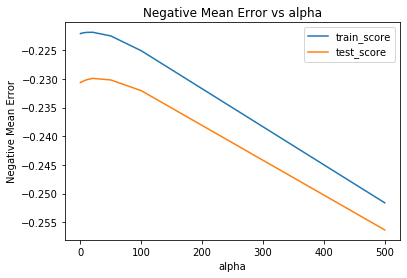

In [66]:
# Plot the Negative Mean Error vs alpha value for test and train scores to chose the best alpha
ridge_cv["param_alpha"] = ridge_cv["param_alpha"].astype("int32")
plt.plot(ridge_cv["param_alpha"], ridge_cv["mean_train_score"])
plt.plot(ridge_cv["param_alpha"], ridge_cv["mean_test_score"])
plt.title("Negative Mean Error vs alpha")
plt.legend(["train_score", "test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Error")
plt.show()

In [67]:
# Get the best alpha value
ridge_model_cv.best_params_

{'alpha': 20}

It is clear from the gridsearch cross validation and the plot that we generated, the best alpha estimator value is **20**

In [68]:
# Build the Ridge model model with alpha 20 and get all the coefficients
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02976537,  0.04861183,  0.25308804,  0.09851643,  0.07046392,
        0.04941204,  0.1044252 ,  0.11124329,  0.0572387 ,  0.00528729,
        0.30812885,  0.05450303,  0.09230367,  0.06774239, -0.07397372,
        0.05141491,  0.00960703,  0.0990196 ,  0.04955007,  0.0336452 ,
        0.04084516,  0.03691746,  0.08971791,  0.15326275,  0.06847549,
       -0.03240655])

In [69]:
# Get all the features and coefficient values for the Ridge model
ridge_df = pd.DataFrame({"Features": X_train.columns, "Coefficient": ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.head(30)

,Features,Coefficient
0,MSSubClass,-0.0298
1,LotArea,0.0486
2,OverallQual,0.2531
3,OverallCond,0.0985
4,BsmtQual,0.0705
5,BsmtExposure,0.0494
6,BsmtFinSF1,0.1044
7,TotalBsmtSF,0.1112
8,HeatingQC,0.0572
9,1stFlrSF,0.0053


In [70]:
# Calculate the mean square error for the ridge model
ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index=X_train.columns))
mean_squared_error(y_test, ridge.predict(X_test))

0.0848670544460298

In [71]:
# Perform RFE to get top 15 features
X_train_ridge = X_train[ridge_df.Features]
lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [72]:
# Get all the top features by using RFE 
df_final = pd.DataFrame(
    list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)),
    columns=["Features", "Support", "Rank"]
)
df_final = df_final.loc[df_final["Support"] == True]
df_final.reset_index(inplace=True, drop=True)

df_final["Coefficient"] = df_final["Features"].apply(lambda x: ridge_coeff[x])
df_final = df_final.sort_values(by=["Coefficient"], ascending=False)
df_final = df_final.head(10)
df_final

,Features,Support,Rank,Coefficient
5,GrLivArea,True,1,0.3081
0,OverallQual,True,1,0.2531
13,Foundation_PConc,True,1,0.1533
4,TotalBsmtSF,True,1,0.1112
3,BsmtFinSF1,True,1,0.1044
11,MSZoning_RL,True,1,0.0990
1,OverallCond,True,1,0.0985
7,GarageCars,True,1,0.0923
12,Foundation_CBlock,True,1,0.0897
2,BsmtQual,True,1,0.0705


In [73]:
# Get the r2 score for the train dataset
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9053085443758982

In [74]:
# Get the r2 score for the test dataset
y_test_pred = ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8996832824733417

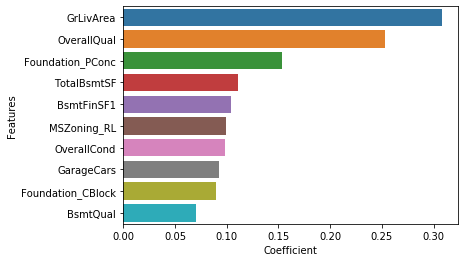

In [75]:
# Plot the features based on coefficient
sns.barplot(y ='Features', x='Coefficient', data=df_final)
plt.show()

***

#### Building Lasso Model

In [76]:
# Define the number of folds and the alpha values for the Lasso model
folds = 5
lasso = Lasso()
params = {"alpha": [
    0.0001, 0.0002, 0.0003, 0.0004,
    0.0005, 0.0006, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8
]}

lasso_model_cv = GridSearchCV(estimator=lasso,                         
    param_grid=params, 
    scoring="neg_mean_absolute_error", 
    cv=folds, 
    return_train_score=True,
    verbose=1
)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                   0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Get the results and analyse the test and train score against all the alpha values
lasso_cv = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv[
    ["param_alpha", "mean_train_score", "mean_test_score", "rank_test_score"]
].sort_values(by=["rank_test_score"])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.002,-0.221917,-0.230351,1
8,0.003,-0.221905,-0.230386,2
6,0.001,-0.221954,-0.230422,3
5,0.0006,-0.221997,-0.230469,4
4,0.0005,-0.222009,-0.230493,5
3,0.0004,-0.222021,-0.230517,6
9,0.004,-0.221960,-0.230527,7
2,0.0003,-0.222033,-0.230543,8
1,0.0002,-0.222047,-0.230570,9
0,0.0001,-0.222062,-0.230599,10


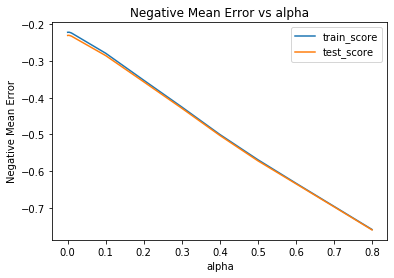

In [78]:
# Plot the Negative Mean Error vs alpha value for test and train scores to chose the best alpha
lasso_cv["param_alpha"] = lasso_cv["param_alpha"].astype("float64")
plt.plot(lasso_cv["param_alpha"], lasso_cv["mean_train_score"])
plt.plot(lasso_cv["param_alpha"], lasso_cv["mean_test_score"])
plt.title("Negative Mean Error vs alpha")
plt.legend(["train_score", "test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Error")
plt.show()

In [79]:
# Get the best alpha value
lasso_model_cv.best_estimator_

Lasso(alpha=0.002)

It is clear from the gridsearch cross validation and the plot that we generated, the best alpha estimator value is **0.005**

In [80]:
# Build the Lasso model model with alpha 20 and get all the coefficients
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.03018161,  0.04573635,  0.26149641,  0.09849513,  0.06460831,
        0.04857195,  0.10579085,  0.11492097,  0.05535719,  0.        ,
        0.31536842,  0.05124204,  0.09179915,  0.06739972, -0.07203282,
        0.05006549,  0.00697376,  0.09847507,  0.04855189,  0.03109509,
        0.03906794,  0.03443289,  0.09318554,  0.15819948,  0.06786923,
       -0.03032603])

In [81]:
# Get all the features and coefficient values for the Lasso model
lasso_df = pd.DataFrame({"Features":X_train.columns, "Coefficient":lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df["Coefficient"] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.head(30)

,Features,Coefficient
0,MSSubClass,-0.0302
1,LotArea,0.0457
2,OverallQual,0.2615
3,OverallCond,0.0985
4,BsmtQual,0.0646
5,BsmtExposure,0.0486
6,BsmtFinSF1,0.1058
7,TotalBsmtSF,0.1149
8,HeatingQC,0.0554
9,GrLivArea,0.3154


In [82]:
# Calculate the mean square error for the ridge model
lasso_coeff = dict(pd.Series(lasso.coef_, index=X_train.columns))
mean_squared_error(y_test, lasso.predict(X_test))

0.08516346261405373

In [83]:
# Perform RFE to get top 15 features
X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [84]:
# Get all the top features by using RFE 
df_final2 = pd.DataFrame(
    list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)),
    columns=["Features", "Support", "Rank"]
)
df_final2 = df_final2.loc[df_final2["Support"] == True]
df_final2.reset_index(drop=True, inplace=True)

df_final2["Coefficient"] = df_final2["Features"].apply(lambda x: lasso_coeff[x])
df_final2 = df_final2.sort_values(by=["Coefficient"], ascending=False)
df_final2 = df_final2.head(10)
df_final2

,Features,Support,Rank,Coefficient
5,GrLivArea,True,1,0.315368
0,OverallQual,True,1,0.261496
13,Foundation_PConc,True,1,0.158199
4,TotalBsmtSF,True,1,0.114921
3,BsmtFinSF1,True,1,0.105791
1,OverallCond,True,1,0.098495
11,MSZoning_RL,True,1,0.098475
12,Foundation_CBlock,True,1,0.093186
7,GarageCars,True,1,0.091799
14,Foundation_Slab,True,1,0.067869


In [85]:
# Get the r2 score for the train dataset
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9053889567218535

In [86]:
# Get the r2 score for the test dataset
y_test_pred = lasso.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8993329145401273

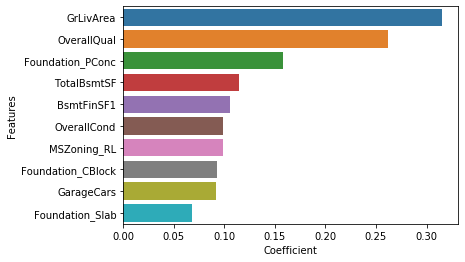

In [87]:
# Plot the features based on coefficient
sns.barplot(y ='Features', x='Coefficient', data=df_final2)
plt.show()

### Summary

- The top 5 variables which are significantly driving the housing price are;
  - `GrLivArea`
  - `OverallQual`
  - `Foundation_PConc`
  - `TotalBsmtSF`
  - `BsmtFinSF1`

<br>

- The R2 value for the Ridge and Lasso model are;
 - **Lasso**: 89.93%
 - **Ridge**: 89.97%
 
 - The plot to compare the Top 10 features of Ridge and Lasso is shown below;

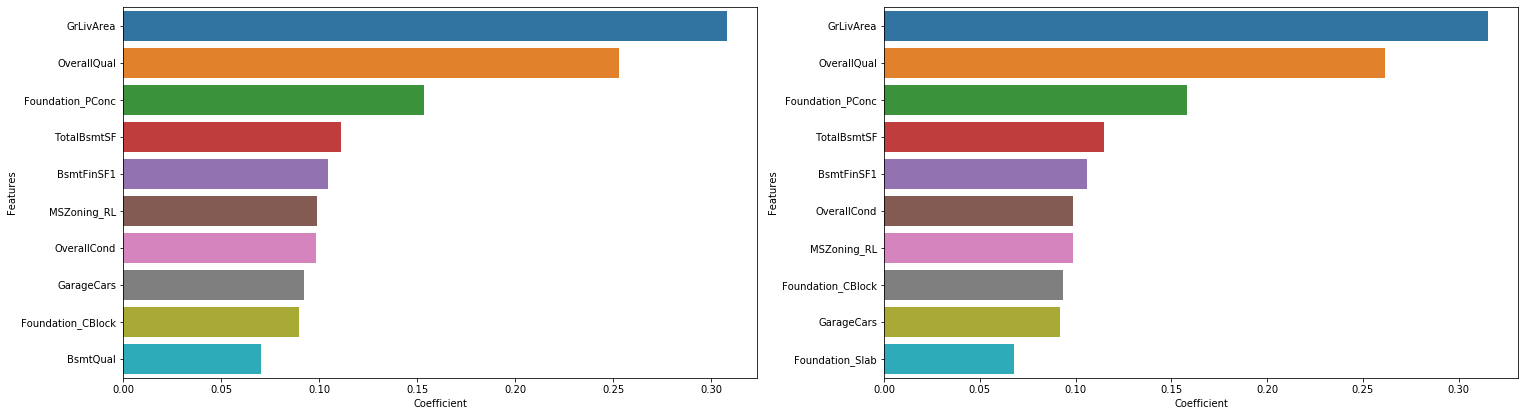

In [88]:
plt.figure(figsize=(25, 15))
plt.subplot(2 , 2, 1)
sns.barplot(y='Features', x='Coefficient', data=df_final)
plt.subplot(2, 2, 2)
sns.barplot(y='Features', x='Coefficient', data=df_final2)
plt.show()

***

### Subject Questions : Conclusion Code

Question 1

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [89]:
# Build the Lasso model model with alpha 0.004, double the value of optimum, and get all the coefficients
alpha = 2 * 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.02688426,  0.04530718,  0.26515817,  0.09482212,  0.06048254,
        0.04650754,  0.10620871,  0.11552462,  0.05389803,  0.        ,
        0.31231209,  0.05111688,  0.09294169,  0.06586416, -0.07405913,
        0.04831143,  0.00423188,  0.09924236,  0.04594382,  0.02870576,
        0.03749025,  0.03157911,  0.07941664,  0.14523963,  0.06002522,
       -0.02952773])

In [90]:
# Get all the features and coefficient values for the Lasso model
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(inplace=True, drop=True)
lasso_df.head(30)

,Features,Coefficient
0,MSSubClass,-0.0269
1,LotArea,0.0453
2,OverallQual,0.2652
3,OverallCond,0.0948
4,BsmtQual,0.0605
5,BsmtExposure,0.0465
6,BsmtFinSF1,0.1062
7,TotalBsmtSF,0.1155
8,HeatingQC,0.0539
9,GrLivArea,0.3123


In [91]:
# Calculate the mean square error for the lasso model
lasso_coeff = dict(pd.Series(lasso.coef_, index = X_train.columns))
mean_squared_error(y_test, lasso.predict(X_test))

0.0848077911891474

In [92]:
# Perform RFE to get top 15 features
X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [93]:
# Get all the top features by using RFE 
df_final = pd.DataFrame(
    list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)),
    columns=['Features', 'Support', 'Rank']
)
df_final = df_final.loc[df_final['Support'] == True]
df_final.reset_index(drop=True, inplace=True)

df_final['Coefficient'] = df_final['Features'].apply(lambda x: lasso_coeff[x])
df_final = df_final.sort_values(by=['Coefficient'], ascending=False)
df_final = df_final.head(10)
df_final

,Features,Support,Rank,Coefficient
5,GrLivArea,True,1,0.312312
0,OverallQual,True,1,0.265158
13,Foundation_PConc,True,1,0.145240
4,TotalBsmtSF,True,1,0.115525
3,BsmtFinSF1,True,1,0.106209
11,MSZoning_RL,True,1,0.099242
1,OverallCond,True,1,0.094822
7,GarageCars,True,1,0.092942
12,Foundation_CBlock,True,1,0.079417
8,SaleCondition,True,1,0.065864


In [94]:
# Get the r2 score for the train dataset
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9050261018437233

In [95]:
# Get the r2 score for the test dataset
y_test_pred = lasso.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8997533343378631

***

In [96]:
# Build the Ridge model model with alpha 40, double the value of optimum, and get all the coefficients
alpha = 2 * 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02622072,  0.05054273,  0.24839312,  0.09537261,  0.07335031,
        0.0480417 ,  0.1030167 ,  0.1039398 ,  0.05780557,  0.01631514,
        0.29778275,  0.05697629,  0.09324322,  0.06684498, -0.07662117,
        0.05098309,  0.00931399,  0.09927026,  0.04807989,  0.03373341,
        0.04075159,  0.0364424 ,  0.07657983,  0.14030544,  0.06146736,
       -0.03349724])

In [97]:
# Get all the features and coefficient values for the Ridge model
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.head(30)

,Features,Coefficient
0,MSSubClass,-0.0262
1,LotArea,0.0505
2,OverallQual,0.2484
3,OverallCond,0.0954
4,BsmtQual,0.0734
5,BsmtExposure,0.0480
6,BsmtFinSF1,0.1030
7,TotalBsmtSF,0.1039
8,HeatingQC,0.0578
9,1stFlrSF,0.0163


In [98]:
# Calculate the mean square error for the ridge model
ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index=X_train.columns))
mean_squared_error(y_test, ridge.predict(X_test))

0.0845539233009501

In [99]:
# Perform RFE to get top 15 features
X_train_ridge = X_train[ridge_df.Features]
lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [100]:
# Get all the top features by using RFE 
df_final2 = pd.DataFrame(
    list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)),
    columns=['Features', 'Support', 'Rank']
)
df_final2 = df_final2.loc[df_final2['Support'] == True]
df_final2.reset_index(drop=True, inplace=True)

df_final2['Coefficient'] = df_final2['Features'].apply(lambda x: ridge_coeff[x])
df_final2 = df_final2.sort_values(by=['Coefficient'], ascending=False)
df_final2 = df_final2.head(10)
df_final2

,Features,Support,Rank,Coefficient
5,GrLivArea,True,1,0.2978
0,OverallQual,True,1,0.2484
13,Foundation_PConc,True,1,0.1403
4,TotalBsmtSF,True,1,0.1039
3,BsmtFinSF1,True,1,0.1030
11,MSZoning_RL,True,1,0.0993
1,OverallCond,True,1,0.0954
7,GarageCars,True,1,0.0932
12,Foundation_CBlock,True,1,0.0766
2,BsmtQual,True,1,0.0734


In [101]:
# Get the r2 score for the train dataset
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9047967561595645

In [102]:
# Get the r2 score for the test dataset
y_test_pred = ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.9000534177258823

***

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [103]:
# Remove the top five variables from the train and test data
X_train.drop(["GrLivArea", "OverallQual", "Foundation_PConc", "TotalBsmtSF", "BsmtFinSF1"], axis=1, inplace=True)
X_test.drop(["GrLivArea", "OverallQual", "Foundation_PConc", "TotalBsmtSF", "BsmtFinSF1"], axis=1, inplace=True)

In [104]:
# Define the number of folds and the alpha values for the Ridge model
folds = 5
params = {'alpha': [
    0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
    0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
    50, 100, 500, 1000 
]}
ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator = ridge, 
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=folds, 
    return_train_score=True,
    verbose=1
)            

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
# Get the results and analyse the test and train score against all the alpha values
ridge_cv = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv[
    ['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']
].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,50,-0.343565,-0.351231,1
24,100,-0.344270,-0.351361,2
22,20,-0.343553,-0.351804,3
21,10,-0.343691,-0.352109,4
20,9,-0.343707,-0.352143,5
19,8,-0.343725,-0.352178,6
18,7,-0.343743,-0.352212,7
17,6,-0.343762,-0.352248,8
16,5,-0.343781,-0.352288,9
15,4,-0.343801,-0.352331,10


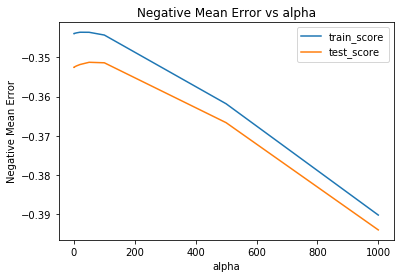

In [106]:
# Plot the Negative Mean Error vs alpha value for test and train scores to chose the best alpha
ridge_cv['param_alpha'] = ridge_cv['param_alpha'].astype('int32')
plt.plot(ridge_cv['param_alpha'], ridge_cv['mean_train_score'])
plt.plot(ridge_cv['param_alpha'], ridge_cv['mean_test_score'])
plt.title("Negative Mean Error vs alpha")
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.show()

In [107]:
# Get the best alpha value
ridge_model_cv.best_params_

{'alpha': 50}

In [108]:
# Build the Ridge model model with alpha 50 and get all the coefficients
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.06423199,  0.12425023,  0.1057112 ,  0.22878149,  0.03769133,
        0.09573483,  0.23629098,  0.15838549,  0.19829937,  0.06252994,
       -0.13268138,  0.09249839,  0.02691897,  0.13136273,  0.04832594,
        0.05268815,  0.03260324,  0.0544121 , -0.05354028,  0.02684026,
       -0.02662827])

In [109]:
# Get all the features and coefficient values for the Ridge model
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(inplace=True, drop=True)
ridge_df.head(30)

,Features,Coefficient
0,MSSubClass,0.0642
1,LotArea,0.1243
2,OverallCond,0.1057
3,BsmtQual,0.2288
4,BsmtExposure,0.0377
5,HeatingQC,0.0957
6,1stFlrSF,0.2363
7,FireplaceQu,0.1584
8,GarageCars,0.1983
9,SaleCondition,0.0625


In [110]:
# Calculate the mean square error for the ridge model
ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
mean_squared_error(y_test, ridge.predict(X_test))

0.16808655623717372

In [111]:
# Perform RFE to get top 15 features
X_train_ridge = X_train[ridge_df.Features]
lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [112]:
# Get all the top features by using RFE 
df_final = pd.DataFrame(
    list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)),
    columns=['Features', 'Support', 'Rank']
)
df_final = df_final.loc[df_final['Support'] == True]
df_final.reset_index(drop=True, inplace=True)

df_final['Coefficient'] = df_final['Features'].apply(lambda x: ridge_coeff[x])
df_final = df_final.sort_values(by=['Coefficient'], ascending=False)
df_final = df_final.head(10)
df_final

,Features,Support,Rank,Coefficient
5,1stFlrSF,True,1,0.2363
3,BsmtQual,True,1,0.2288
7,GarageCars,True,1,0.1983
6,FireplaceQu,True,1,0.1584
11,MSZoning_RL,True,1,0.1314
1,LotArea,True,1,0.1243
2,OverallCond,True,1,0.1057
4,HeatingQC,True,1,0.0957
10,MSZoning_FV,True,1,0.0925
0,MSSubClass,True,1,0.0642


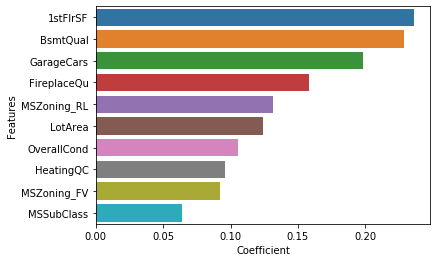

In [113]:
# Plot the features based on coefficient
sns.barplot(y ='Features', x='Coefficient', data=df_final)
plt.show()

***

In [114]:
# Define the number of folds and the alpha values for the Lasso model
folds = 5
lasso = Lasso()
params = {'alpha': [
    0.0001, 0.0002, 0.0003, 0.0004,
    0.0005, 0.001, 0.002, 0.003, 0.004,
    0.005, 0.01
]}
lasso_model_cv = GridSearchCV(estimator = lasso,                         
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=folds, 
    return_train_score=True,
    verbose=1
)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
# Get the results and analyse the test and train score against all the alpha values
lasso_cv = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv[
    ["param_alpha", "mean_train_score", "mean_test_score", "rank_test_score"]
].sort_values(by=["rank_test_score"])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.005,-0.343254,-0.351944,1
8,0.004,-0.343323,-0.352026,2
10,0.01,-0.343323,-0.352078,3
7,0.003,-0.343420,-0.352120,4
6,0.002,-0.343553,-0.352220,5
5,0.001,-0.343711,-0.352329,6
4,0.0005,-0.343799,-0.352420,7
3,0.0004,-0.343817,-0.352440,8
2,0.0003,-0.343835,-0.352460,9
1,0.0002,-0.343853,-0.352479,10


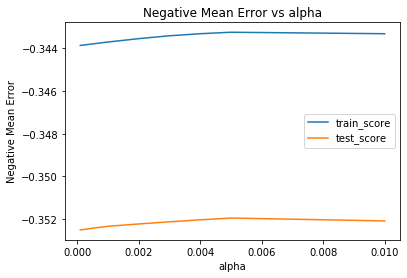

In [116]:
# Plot the Negative Mean Error vs alpha value for test and train scores to chose the best alpha
lasso_cv['param_alpha'] = lasso_cv['param_alpha'].astype('float64')
plt.plot(lasso_cv['param_alpha'], lasso_cv['mean_train_score'])
plt.plot(lasso_cv['param_alpha'], lasso_cv['mean_test_score'])
plt.title("Negative Mean Error vs alpha")
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.show()

In [117]:
# Get the best alpha value
lasso_model_cv.best_estimator_

Lasso(alpha=0.005)

In [118]:
# Build the Lasso model model with alpha 0.005 and get all the coefficients
alpha = 0.005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.0640277 ,  0.12114089,  0.10948152,  0.24317483,  0.02816013,
        0.09522088,  0.24551954,  0.16026957,  0.21108043,  0.06105933,
       -0.12973162,  0.10396558,  0.0229635 ,  0.12961376,  0.04460347,
        0.04363071,  0.01571955,  0.04874449, -0.04862397,  0.02902116,
       -0.01419854])

In [119]:
# Get all the features and coefficient values for the Lasso model
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(inplace=True, drop=True)
lasso_df.head(30)

,Features,Coefficient
0,MSSubClass,0.0640
1,LotArea,0.1211
2,OverallCond,0.1095
3,BsmtQual,0.2432
4,BsmtExposure,0.0282
5,HeatingQC,0.0952
6,1stFlrSF,0.2455
7,FireplaceQu,0.1603
8,GarageCars,0.2111
9,SaleCondition,0.0611


In [120]:
# Calculate the mean square error for the ridge model
lasso_coeff = dict(pd.Series(lasso.coef_, index = X_train.columns))
mean_squared_error(y_test, lasso.predict(X_test))

0.16827840832825736

In [121]:
# Perform RFE to get top 15 features
X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [122]:
# Get all the top features by using RFE 
df_final2 = pd.DataFrame(
    list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)),
    columns=['Features', 'Support', 'Rank']
)
df_final2 = df_final2.loc[df_final2['Support'] == True]
df_final2.reset_index(drop=True, inplace=True)

df_final2['Coefficient'] = df_final2['Features'].apply(lambda x: lasso_coeff[x])
df_final2 = df_final2.sort_values(by=['Coefficient'], ascending=False)
df_final2 = df_final2.head(10)
df_final2

,Features,Support,Rank,Coefficient
5,1stFlrSF,True,1,0.245520
3,BsmtQual,True,1,0.243175
7,GarageCars,True,1,0.211080
6,FireplaceQu,True,1,0.160270
11,MSZoning_RL,True,1,0.129614
1,LotArea,True,1,0.121141
2,OverallCond,True,1,0.109482
10,MSZoning_FV,True,1,0.103966
4,HeatingQC,True,1,0.095221
0,MSSubClass,True,1,0.064028


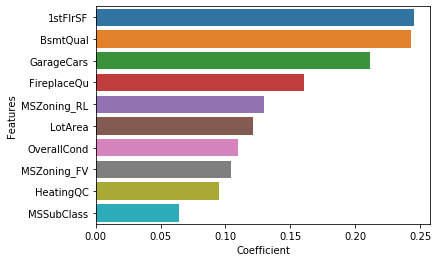

In [123]:
# Plot the features based on coefficient
sns.barplot(y="Features", x="Coefficient", data=df_final2)
plt.show()

### End of Subject Questions : Conclusion Code

***